In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv("HCV-Egy-Data.csv")

In [3]:
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [5]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

#from above two we can conclude that there are no object datatype in data and there are no null values

In [6]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


#1.a)

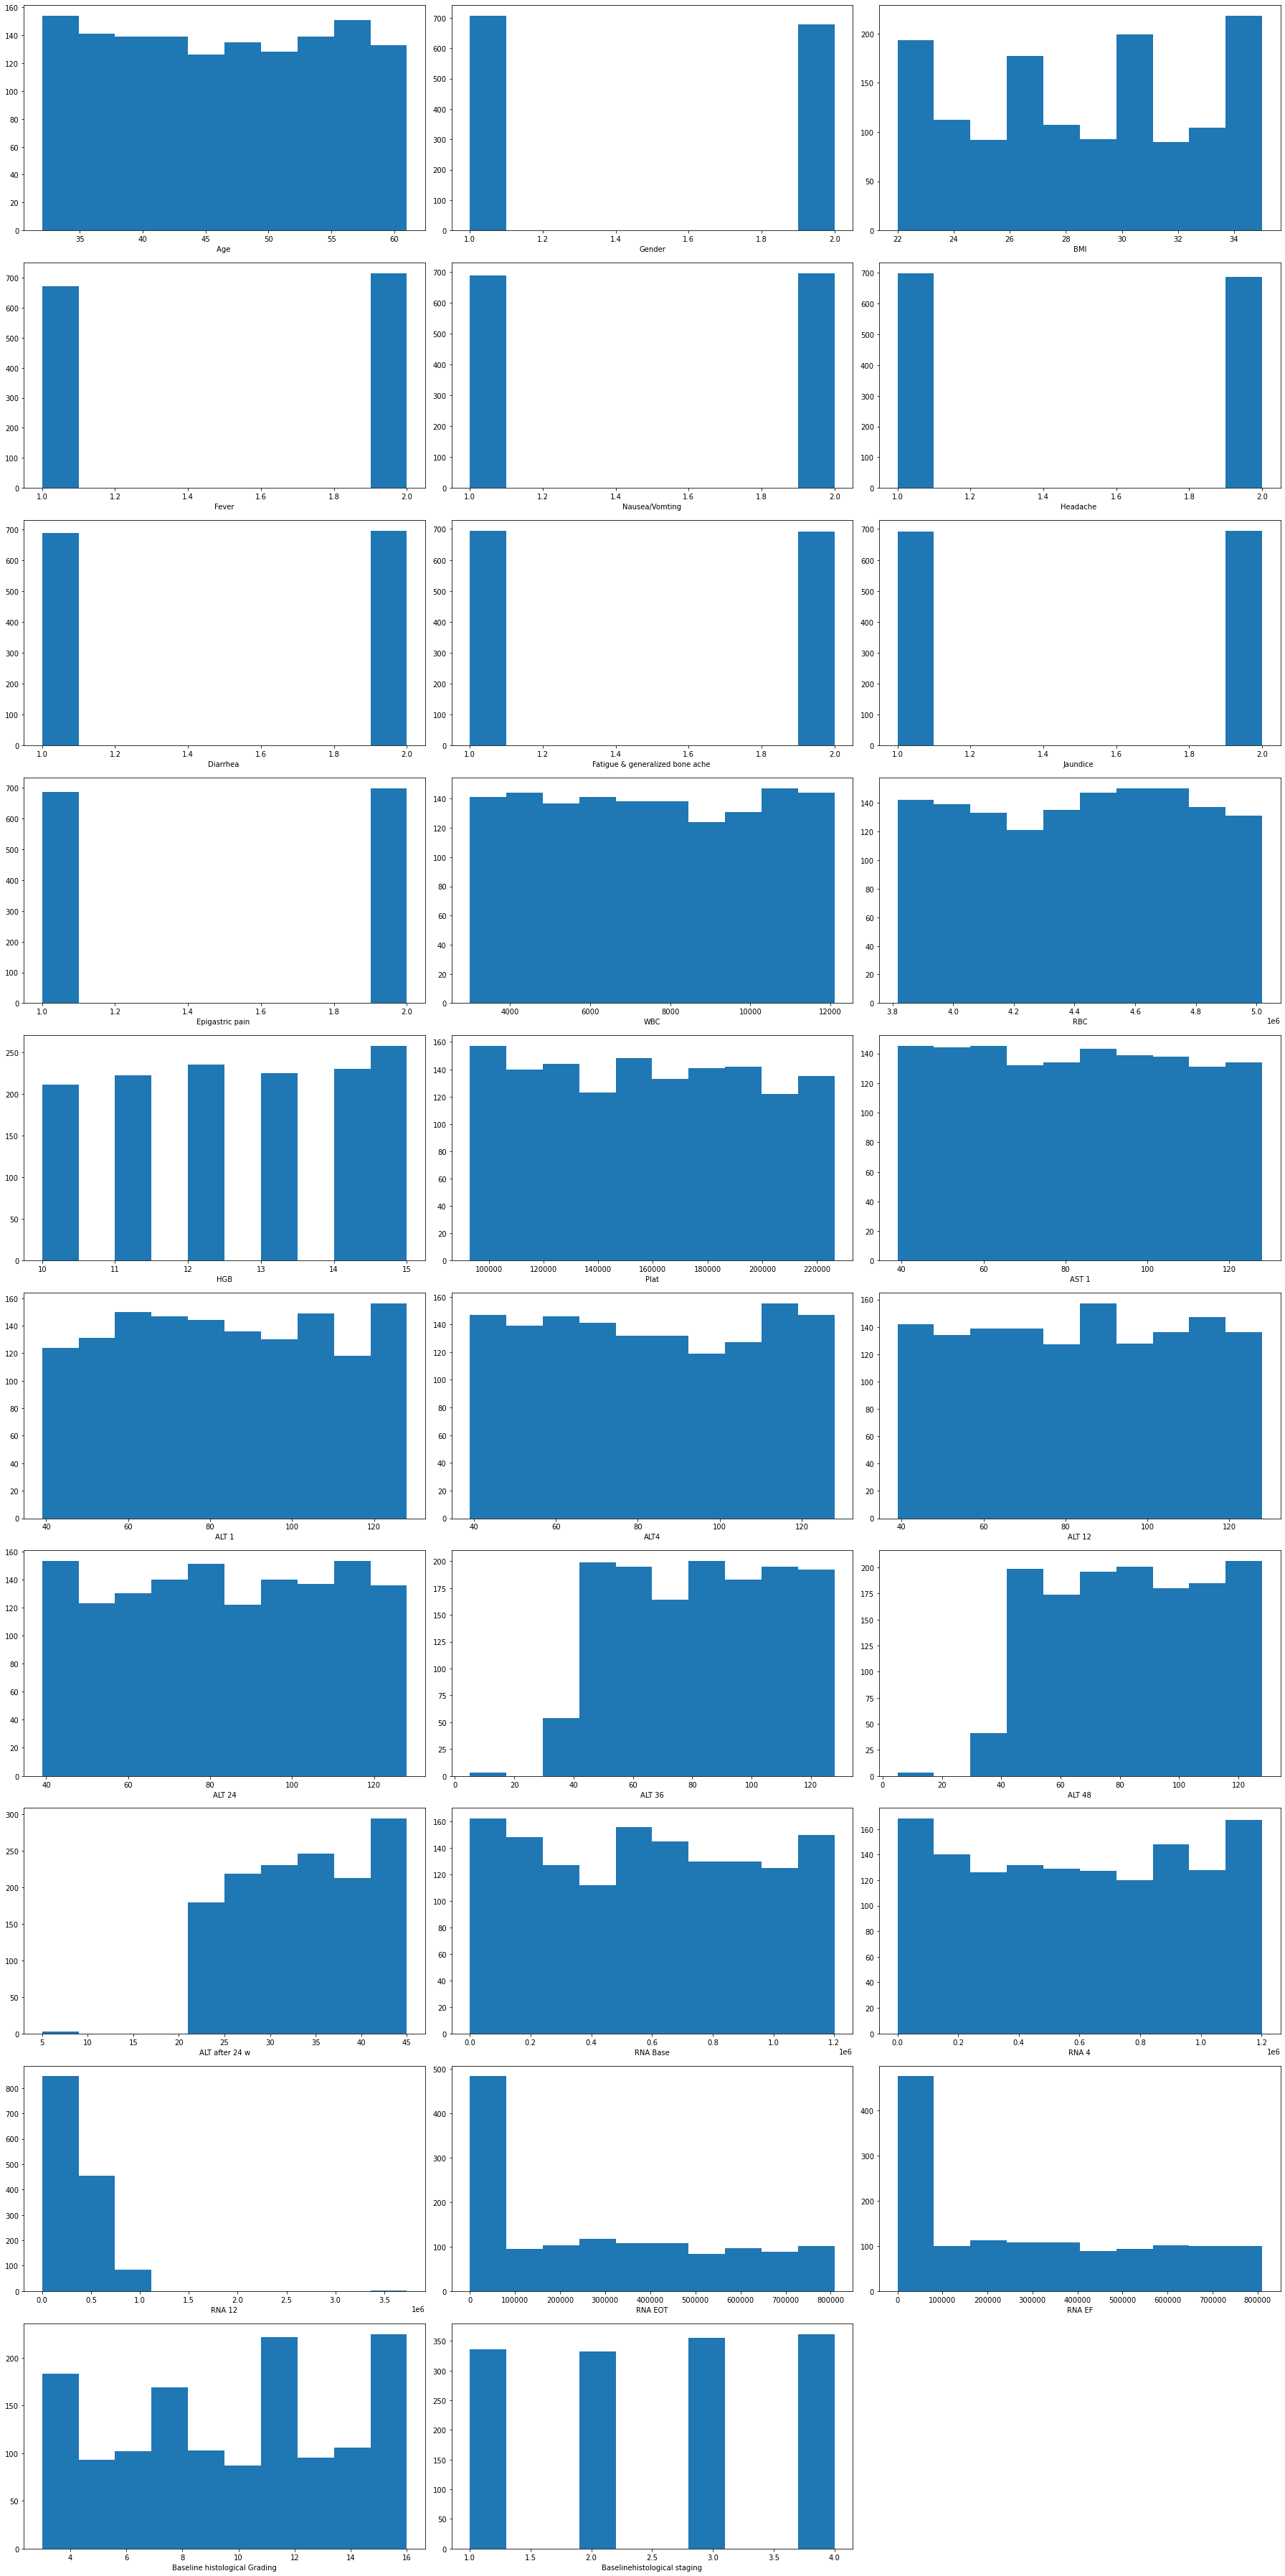

In [7]:
plt.figure(figsize=(25, 50))

for i, col in enumerate(df.columns,1):
    plt.subplot(10,3, i)
    plt.hist(df[col])
    plt.xlabel(col)
plt.tight_layout()

#Explanation:-Here we can see frequency distribution of all the columns in dataset.we can conclude that patients age ranges from nearly 30 to almost 62.Females are sightly more than males.BMI number 22,26,30 and 34 are frequent.Fever,Nausea,Headache,Diarrhea,Fatique and generalized bone ache,jaundice,Epigastric pain are some frequent parameters taken into consideration.Then there are different test for WBC,RBC,HGB,PLAT,AST(weak wise),RNA AND after taking all of this into consideration we will get output or result as No Fibrosis, Portal Fibrosis,Staging (Class Label) Few Septa, Many Septa, Cirrhosis

#1.b)

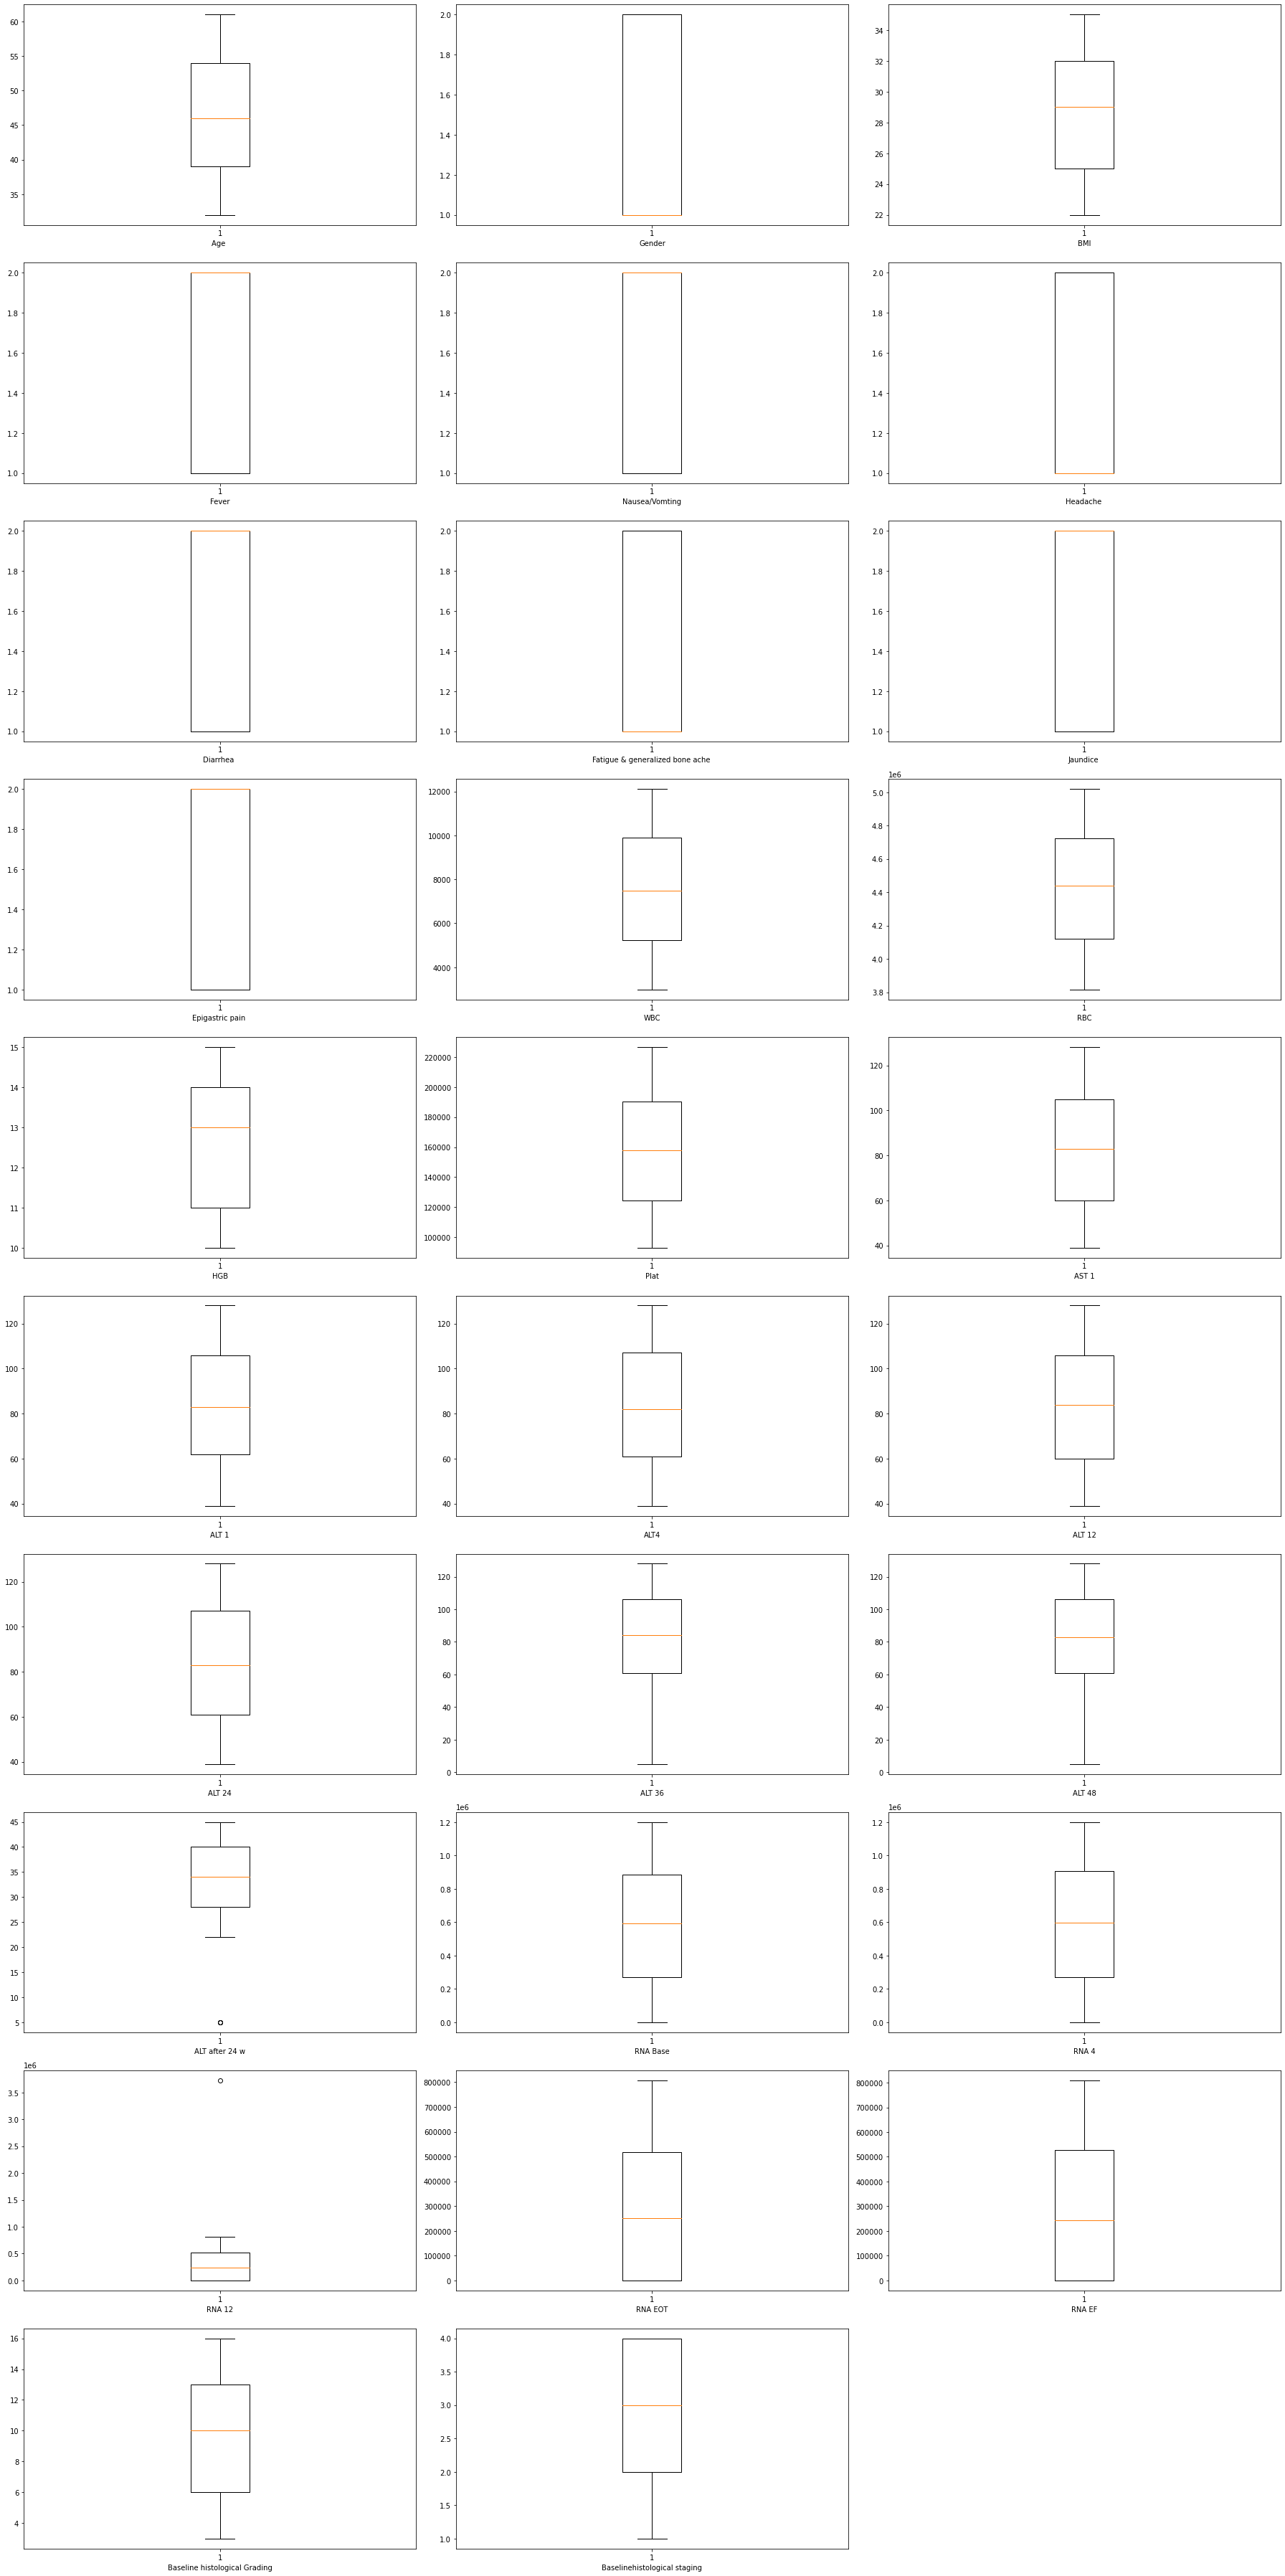

In [8]:
plt.figure(figsize=(25, 50))

for i, col in enumerate(df.columns,1):
    plt.subplot(10,3, i)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.tight_layout()

#explanation:-from this boxplot I can conclude there there are no outliers in this dataset except from RNA12 and ALT after 24 w

# 1.c)


In [9]:
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for HCV EGY Data', fontsize=15)
    plt.show()

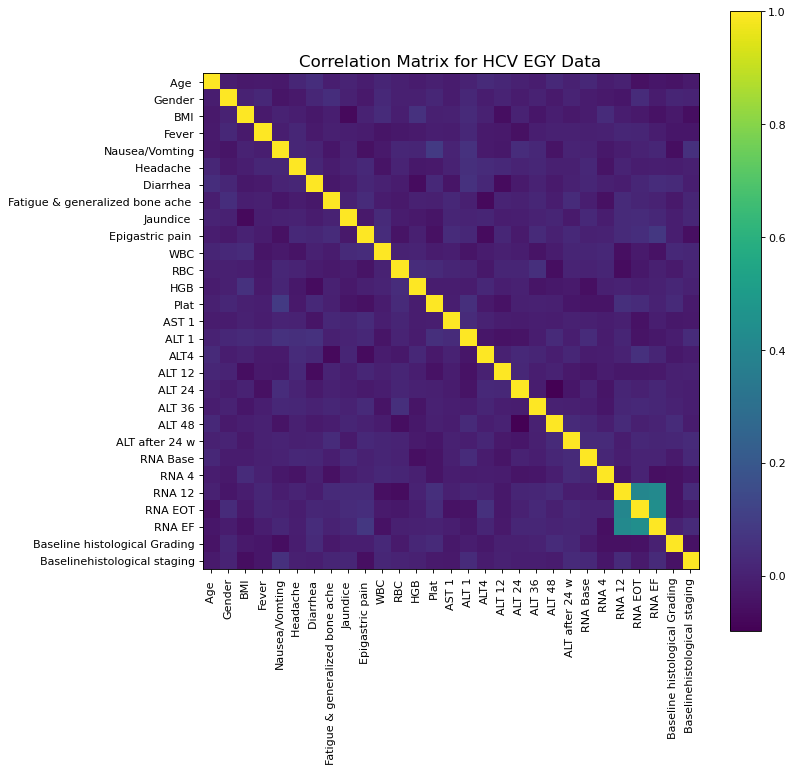

In [10]:
plotCorrelationMatrix(df,10)

#explanation:-From the matrix above we can say that there is hardly any correaltion between them.

#1.d)

In [11]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [12]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.head(10)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,2.876603e+05,2.913783e+05,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,2.645595e+05,2.677007e+05,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000e+00,5.000000e+00,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,2.513760e+05,2.440490e+05,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,5.178060e+05,5.278640e+05,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,8.084500e+05,8.103330e+05,16.000000,4.000000
var,77.114843,0.250071,16.615532,0.249939,0.250174,0.250165,0.250174,0.250179,0.250179,0.250165,...,696.908827,687.695799,50.035384,1.252702e+11,1.312723e+11,8.142501e+10,6.999174e+10,7.166366e+10,16.191743,1.257521
skew,0.006835,0.041932,-0.035573,-0.062191,-0.010119,0.015902,-0.010119,0.004337,-0.004337,-0.015902,...,-0.041431,-0.044457,-0.111222,1.866637e-02,4.409373e-03,1.597587e+00,4.115447e-01,4.050748e-01,-0.105961,-0.051219


#explantion:-

#1.e)  ->1st method (Correlation of features to Target)

In [13]:
corr = df.corr()
corr_target = abs(corr['Baselinehistological staging'])
# print(corr_target.sort_values() )
print(df.columns[corr_target > 0.3][:-1])

relevant_features = corr_target[corr_target>0]
relevant_features

Index([], dtype='object')


Age                                 0.019599
Gender                              0.011955
BMI                                 0.057259
Fever                               0.030975
Nausea/Vomting                      0.054906
Headache                            0.001996
Diarrhea                            0.005639
Fatigue & generalized bone ache     0.014563
Jaundice                            0.020219
Epigastric pain                     0.052110
WBC                                 0.017945
RBC                                 0.009623
HGB                                 0.002752
Plat                                0.017284
AST 1                               0.025126
ALT 1                               0.036867
ALT4                                0.014997
ALT 12                              0.000809
ALT 24                              0.004888
ALT 36                              0.006430
ALT 48                              0.013533
ALT after 24 w                      0.033919
RNA Base  

#explanation:-correaltion is very low

#1.e)   -> 2nd method (RFE)

In [14]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30, random_state=7)

In [16]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [17]:
rfe = RFE(estimator=model_dt, n_features_to_select=1, step=1)

In [18]:
rfe.fit(X_train,y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

In [19]:
for rank, col in zip(rfe.ranking_,X.columns):
    print(rank, col)

14 Age 
24 Gender
15 BMI
28 Fever
23 Nausea/Vomting
26 Headache 
22 Diarrhea 
27 Fatigue & generalized bone ache 
21 Jaundice 
25 Epigastric pain 
8 WBC
17 RBC
19 HGB
9 Plat
12 AST 1
6 ALT 1
10 ALT4
2 ALT 12
3 ALT 24
13 ALT 36
5 ALT 48
11 ALT after 24 w
1 RNA Base
7 RNA 4
18 RNA 12
20 RNA EOT
4 RNA EF
16 Baseline histological Grading


#explanation:-We have rank here according to which we can select columns
#1 RNA Base 2 WBC 3 Plat 4 RBC 5 ALT 24 these are 5 important features

#1.e) (Lasso)

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01) #0.01
lasso.fit(X_train, y_train)
lasso.coef_

array([-2.55785317e-03,  1.58948175e-02, -1.31832233e-02, -5.44390142e-02,
        7.95926867e-02,  1.32704650e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.40980779e-02,  1.06305830e-05,  3.56373703e-08,
        2.24567502e-02,  1.31469921e-07, -1.30613858e-03,  2.07409163e-03,
       -6.22266629e-04,  3.25371070e-04, -1.35272810e-03,  4.99351197e-04,
        6.79383510e-06,  3.44373521e-03, -1.01470856e-08, -1.56106735e-07,
        1.12442903e-07, -2.03126098e-07,  9.22075259e-08, -1.48599713e-02])

In [21]:
X_train.columns[abs(lasso.coef_)>0]

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading'],
      dtype='object')

#1.e)   (Gini Index)

In [22]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
m = max(model_dt.feature_importances_)
for imp, col in zip(model_dt.feature_importances_,X.columns):
    print(col, imp/m*100)

Age  57.03718666869149
Gender 6.167010816045742
BMI 41.07837690723504
Fever 1.887860453891554
Nausea/Vomting 18.31424794910717
Headache  5.215677214770982
Diarrhea  15.059327804391184
Fatigue & generalized bone ache  10.91812629167282
Jaundice  30.743657661429207
Epigastric pain  15.436345425819017
WBC 52.48482814791654
RBC 78.71474246453737
HGB 33.76414033010492
Plat 64.44645733470777
AST 1 70.22905732514283
ALT 1 79.45585207677523
ALT4 100.0
ALT 12 52.63478289809449
ALT 24 85.8212048673605
ALT 36 73.11626055707707
ALT 48 74.90305941854798
ALT after 24 w 54.50801587755711
RNA Base 51.564514684462104
RNA 4 87.2372192698225
RNA 12 47.08350647870646
RNA EOT 34.19978146487394
RNA EF 60.86093320431469
Baseline histological Grading 68.58123131327676
